PRID2011 dataset : https://www.tugraz.at/institute/icg/research/team-bischof/lrs/downloads/prid11/

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import json
from glob import glob

In [2]:
path_prid2011 = '/home/mvlab/Downloads/dataset/prid_2011/'
path_prid2011_single_a = path_prid2011 + 'single_shot/cam_a/'
path_prid2011_single_b = path_prid2011 + 'single_shot/cam_b/'

In [3]:
os.path.isdir(path_prid2011),os.path.isdir(path_prid2011_single_a),os.path.isdir(path_prid2011_single_b)

(True, True, True)

In [4]:
paths_single_a_img = glob(path_prid2011_single_a+'*.png')
len(paths_single_a_img), paths_single_a_img[0]

(385,
 '/home/mvlab/Downloads/dataset/prid_2011/single_shot/cam_a/person_0342.png')

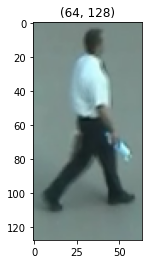

In [5]:
img0 = Image.open(paths_single_a_img[0])
plt.title(str(img0.size))
ax = plt.imshow(img0)

In [6]:
def load_prid_data(path_folder):
    list_img = []
    list_id = []
    if not os.path.isdir(path_folder):
        print('not exist folder', path_folder)
        return
    
    paths_png = glob(path_folder + '*.png')
    paths_png = np.sort(paths_png)
    
    m = len(paths_png)
    for i in range(m):
        path_png = paths_png[i]
        img = Image.open(path_png)
        list_img.append(img)
        
        file_name = path_png.split(os.sep)[-1]
        file_pre = file_name.split('.')[0]
        person_id = file_pre.split('_')[-1]        
        person_id = int(person_id)
        #print('person_id', person_id)
        list_id.append(person_id)
    
    print('len', len(list_img), len(list_id))
    return list_img, list_id            

In [7]:
list_img_a, list_id_a = load_prid_data(path_prid2011_single_a)
min(list_id_a), max(list_id_a), len(list_id_a), list_id_a[0], list_id_a[-1]

len 385 385


(1, 385, 385, 1, 385)

In [8]:
list_img_b, list_id_b = load_prid_data(path_prid2011_single_b)
min(list_id_b), max(list_id_b), len(list_id_b)

len 749 749


(1, 749, 749)

set_img_size 1 {(64, 128)}


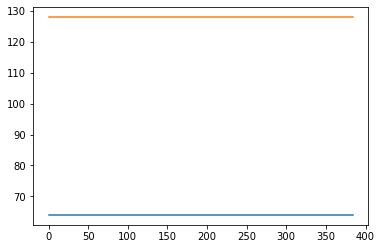

In [9]:
list_img_size = []
set_img_size = set()
for i in range(len(list_img_a)):
    img = list_img_a[i]
    img_size = img.size
    list_img_size.append(img.size)
    set_img_size.add(img.size)
    #print(img_size, img_size[0], img_size[1])

arr_img_size = np.stack(list_img_size)
arr_img_size.shape
ax = plt.plot(arr_img_size)
print('set_img_size', len(set_img_size), set_img_size)

In [10]:
def attach_person(imgs, ids, col=20, img_h=128, img_w=64):
    max_m = max(ids)
    row = (max_m - 1)//col + 1
    print('m', len(ids), 'max_m', max_m, 'row', row,'col', col)
    canvas = np.zeros((row * img_h, col * img_w, 3), np.uint8)
    for i in range(len(ids)):
        person_id = ids[i]
        img = imgs[i]
        offset_y = (person_id//col) * img_h
        offset_x = (person_id%col) * img_w
        img_arr = np.array(img)
        canvas[offset_y:offset_y+img_h, offset_x:offset_x+img_w] = img_arr
    
    return canvas

In [11]:
canvas_a = attach_person(list_img_a, list_id_a, col=40)

m 385 max_m 385 row 10 col 40


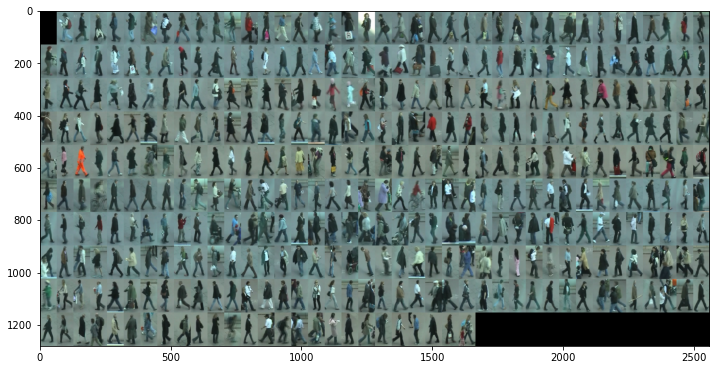

In [12]:
plt.figure(figsize=(12,16))
plt.imshow(canvas_a)

In [13]:
canvas_b = attach_person(list_img_b, list_id_b, col=40)

m 749 max_m 749 row 19 col 40


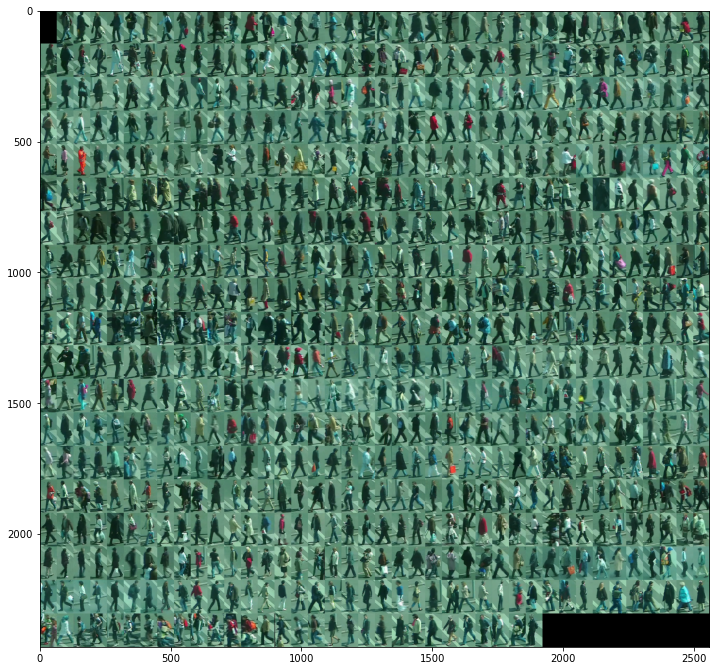

In [14]:
plt.figure(figsize=(12,16))
plt.imshow(canvas_b)

In [15]:
def display_person_by_id(idx):
    if idx > len(list_img_a):
        print('out of range idx in list_img_a', idx, len(list_img_a))
        return
    if idx > len(list_img_b):
        print('out of range idx in list_img_b', idx, len(list_img_b))
        return
    
    ax = plt.imshow(np.concatenate((np.array(list_img_a[idx]), np.array(list_img_b[idx])), 1))    

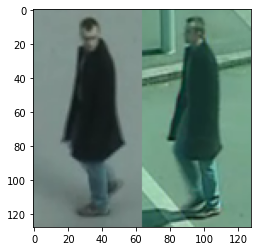

In [16]:
display_person_by_id(100)